<a href="https://colab.research.google.com/github/jimmyfloyd91/refyearRNN/blob/main/ryRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/My Drive/pgdata.csv", encoding="latin1")

In [ ]:
df.head(10)

,DATE,TEMP,MAXTEMP,MINTEMP,NTEMP,HUM,NHUM,WS,MAXWS,NWS
0,2002-01-01,1.8,3.5,-0.6,6.0,0.360,6.0,6.6,8.0,6.0
1,2002-01-02,0.6,6.4,-4.4,7.0,0.363,7.0,2.0,6.0,7.0
2,2002-01-03,0.1,3.8,-3.4,4.0,0.506,4.0,3.0,6.0,4.0
3,2002-01-04,-1.4,1.4,-4.1,6.0,0.333,6.0,5.5,8.0,4.0
4,2002-01-05,0.8,7.7,-3.0,5.0,0.288,5.0,5.0,6.0,5.0
5,2002-01-06,5.6,12.1,1.0,6.0,0.325,6.0,4.2,6.0,6.0
6,2002-01-07,4.4,12.0,-2.9,6.0,0.492,6.0,3.2,6.0,6.0
7,2002-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2002-01-09,4.2,11.3,-0.7,6.0,0.596,6.0,1.2,3.0,6.0
9,2002-01-10,5.5,14.1,-1.0,4.0,0.574,4.0,0.3,1.0,4.0


In [ ]:
df.columns

Index(['DATE', 'TEMP', 'MAXTEMP', 'MINTEMP', 'NTEMP', 'HUM', 'NHUM', 'WS',
       'MAXWS', 'NWS'],
      dtype='object')

In [ ]:
df.index

RangeIndex(start=0, stop=6209, step=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6209 entries, 0 to 6208
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     6209 non-null   object 
 1   TEMP     5847 non-null   float64
 2   MAXTEMP  5847 non-null   float64
 3   MINTEMP  5847 non-null   float64
 4   NTEMP    5847 non-null   float64
 5   HUM      5846 non-null   float64
 6   NHUM     5846 non-null   float64
 7   WS       5743 non-null   float64
 8   MAXWS    5599 non-null   float64
 9   NWS      5743 non-null   float64
dtypes: float64(9), object(1)
memory usage: 485.2+ KB


In [ ]:
df.shape

(6209, 10)

In [ ]:
df.describe()

,TEMP,MAXTEMP,MINTEMP,NTEMP,HUM,NHUM,WS,MAXWS,NWS
count,5847.000000,5847.000000,5847.000000,5847.000000,5846.000000,5846.000000,5743.00000,5599.000000,5743.000000
mean,16.980007,22.057927,11.944519,14.627501,0.593330,14.594595,1.79051,3.418289,14.158628
std,8.507009,9.238121,7.633795,7.262804,0.189326,7.250040,1.12956,1.636619,7.039775
min,-5.500000,-4.200000,-7.100000,4.000000,0.190000,4.000000,0.00000,1.000000,4.000000
25%,9.900000,14.300000,6.000000,7.000000,0.436000,7.000000,1.10000,2.000000,7.000000
50%,16.600000,21.800000,11.800000,19.000000,0.566000,19.000000,1.60000,3.000000,17.000000
75%,24.200000,29.800000,18.300000,20.000000,0.738750,20.000000,2.20000,4.000000,20.000000
max,37.400000,44.800000,30.800000,24.000000,1.000000,24.000000,9.40000,20.000000,24.000000


In [ ]:
df.isnull().sum()

,0
DATE,0
TEMP,362
MAXTEMP,362
MINTEMP,362
NTEMP,362
HUM,363
NHUM,363
WS,466
MAXWS,610
NWS,466


In [ ]:
df

,DATE,TEMP,MAXTEMP,MINTEMP,NTEMP,HUM,NHUM,WS,MAXWS,NWS
0,2002-01-01,1.8,3.5,-0.6,6.0,0.360,6.0,6.6,8.0,6.0
1,2002-01-02,0.6,6.4,-4.4,7.0,0.363,7.0,2.0,6.0,7.0
2,2002-01-03,0.1,3.8,-3.4,4.0,0.506,4.0,3.0,6.0,4.0
3,2002-01-04,-1.4,1.4,-4.1,6.0,0.333,6.0,5.5,8.0,4.0
4,2002-01-05,0.8,7.7,-3.0,5.0,0.288,5.0,5.0,6.0,5.0
...,...,...,...,...,...,...,...,...,...,...
6204,2018-12-27,3.8,11.1,-2.1,20.0,0.638,20.0,1.4,3.0,20.0
6205,2018-12-28,5.0,11.5,-2.0,20.0,0.687,20.0,1.2,2.0,13.0
6206,2018-12-29,7.1,13.7,-0.4,20.0,0.523,20.0,3.0,6.0,20.0
6207,2018-12-30,5.5,10.4,1.5,19.0,0.549,19.0,1.6,4.0,18.0


In [ ]:
df.drop(['NTEMP', 'NHUM', 'NWS'], axis=1, inplace=True)


In [ ]:
df['DATE'] = pd.to_datetime(df['DATE'])
df['TEMP'] = df['TEMP'].interpolate(method='linear').round(1)
df['MAXTEMP'] = df['MAXTEMP'].interpolate(method='linear').round(1)
df['MINTEMP'] = df['MINTEMP'].interpolate(method='linear').round(1)
df['HUM'] = df['HUM'].interpolate(method='linear').round(3)
df['WS'] = df['WS'].interpolate(method='linear').round(1)
df['MAXWS'] = df['MAXWS'].interpolate(method='linear').round(1)


In [ ]:
file_path = '/content/drive/My Drive/pgdataint.csv'
df.to_csv(file_path, index=False)

In [ ]:
import pandas as pd
df['DATE'] = pd.to_datetime(df['DATE'])
df = df.set_index('DATE')

df_train = df["2002-01-01":"2013-12-31"]
df_valid = df["2014-01-01":"2017-12-31"]
df_test = df["2018-01-01":"2018-12-31"]

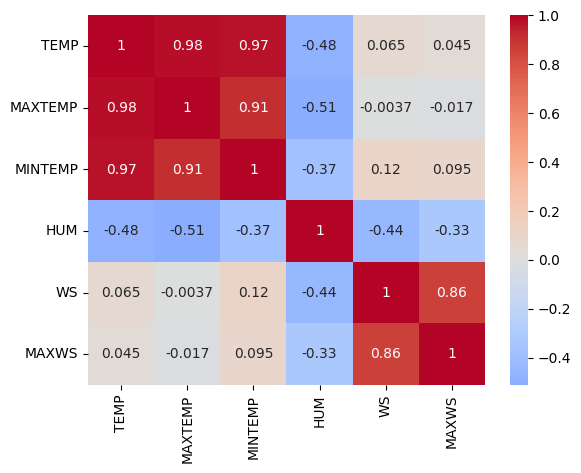

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()

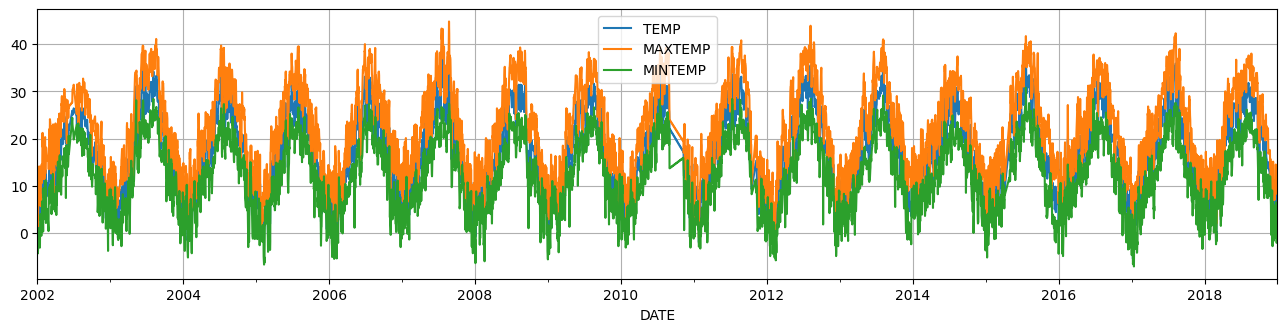

In [ ]:
import matplotlib.pyplot as plt
df["2002-01-01":"2018-12-31"][["TEMP", "MAXTEMP", "MINTEMP"]].plot(grid=True, figsize=(16, 3.5))
plt.show()

In [ ]:
for idx, col_name in enumerate(df.columns):
    print(f"Index: {idx}, Column Name: {col_name}")


Index: 0, Column Name: TEMP
Index: 1, Column Name: MAXTEMP
Index: 2, Column Name: MINTEMP
Index: 3, Column Name: HUM
Index: 4, Column Name: WS
Index: 5, Column Name: MAXWS


In [ ]:
import tensorflow as tf

def split_inputs_and_targets(time_series, ahead=365, target_cols=0):
	return time_series[:, :-ahead], time_series[:, -ahead:, target_cols]

seq_length = 365
train_ds = tf.keras.utils.timeseries_dataset_from_array(
	df_train.to_numpy(),
	targets=None,
	sequence_length=seq_length + 365,
	batch_size=32,
	shuffle=True,
	seed=42
).map(split_inputs_and_targets)


valid_ds = tf.keras.utils.timeseries_dataset_from_array(
	df_valid.to_numpy(),
	targets=None,
	sequence_length=seq_length + 365,
	batch_size=32
).map(split_inputs_and_targets)



In [ ]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor="val_mae", patience=20, restore_best_weights=True)


In [ ]:
model_32 = tf.keras.Sequential([
	tf.keras.layers.SimpleRNN(32, input_shape=[None, 6]),
	tf.keras.layers.Dense(365)
])
model_32.compile(loss='mse', optimizer='adam', metrics=["mae"])
history = model_32.fit(train_ds, validation_data=valid_ds, epochs=100, callbacks=[early_stopping_cb])


Epoch 1/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 11s 79ms/step - loss: 326.1526 - mae: 15.8975 - val_loss: 264.7811 - val_mae: 13.9706
Epoch 2/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 224.6591 - mae: 12.5696 - val_loss: 186.7640 - val_mae: 11.2347
Epoch 3/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - loss: 158.5238 - mae: 10.2075 - val_loss: 137.3143 - val_mae: 9.4110
Epoch 4/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 117.9639 - mae: 8.7722 - val_loss: 107.8466 - val_mae: 8.3462
Epoch 5/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 9s 77ms/step - loss: 94.9378 - mae: 7.9905 - val_loss: 91.4918 - val_mae: 7.7814
Epoch 6/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 83.0982 - mae: 7.6037 - val_loss: 83.0337 - val_mae: 7.5301
Epoch 7/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 9s 76ms/step - loss: 77.5257 - mae: 7.4422 - val_loss: 78.9263 - val_mae: 7.4135
Epoch 8/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 74.9684 - mae: 7.3700 - val_loss: 77.0179 - val_mae: 7.3614
Epoch 9/10

In [ ]:
model_64 = tf.keras.Sequential([
	tf.keras.layers.SimpleRNN(64, input_shape=[None, 6]),
	tf.keras.layers.Dense(365)
])
model_64.compile(loss='mse', optimizer='adam', metrics=["mae"])
history = model_64.fit(train_ds, validation_data=valid_ds, epochs=100)


Epoch 1/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - loss: 302.2238 - mae: 15.1184 - val_loss: 184.8610 - val_mae: 11.1639
Epoch 2/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - loss: 146.1700 - mae: 9.7669 - val_loss: 106.3443 - val_mae: 8.2930
Epoch 3/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - loss: 90.8848 - mae: 7.8578 - val_loss: 82.6146 - val_mae: 7.5185
Epoch 4/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 12s 76ms/step - loss: 76.5861 - mae: 7.4152 - val_loss: 76.9619 - val_mae: 7.3595
Epoch 5/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - loss: 74.0798 - mae: 7.3525 - val_loss: 75.7636 - val_mae: 7.3249
Epoch 6/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - loss: 73.7259 - mae: 7.3445 - val_loss: 75.5022 - val_mae: 7.3173
Epoch 7/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 11s 69ms/step - loss: 73.7277 - mae: 7.3467 - val_loss: 75.4417 - val_mae: 7.3155
Epoch 8/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - loss: 73.7807 - mae: 7.3508 - val_loss: 75.4251 - val_mae: 7.3152
Epoch 9/100


In [ ]:
model_128 = tf.keras.Sequential([
	tf.keras.layers.SimpleRNN(128, input_shape=[None, 6]),
	tf.keras.layers.Dense(365)
])
model_128.compile(loss='mse', optimizer='adam', metrics=["mae"])
history = model_128.fit(train_ds, validation_data=valid_ds, epochs=100)


Epoch 1/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 15s 112ms/step - loss: 259.7628 - mae: 13.6737 - val_loss: 103.5598 - val_mae: 8.1952
Epoch 2/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 13s 112ms/step - loss: 85.1185 - mae: 7.6773 - val_loss: 76.5951 - val_mae: 7.3486
Epoch 3/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 19s 98ms/step - loss: 73.8080 - mae: 7.3438 - val_loss: 75.4714 - val_mae: 7.3166
Epoch 4/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 22s 110ms/step - loss: 73.7462 - mae: 7.3484 - val_loss: 75.4349 - val_mae: 7.3158
Epoch 5/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 13s 111ms/step - loss: 73.7013 - mae: 7.3459 - val_loss: 75.4242 - val_mae: 7.3152
Epoch 6/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 13s 110ms/step - loss: 73.7384 - mae: 7.3487 - val_loss: 75.4372 - val_mae: 7.3159
Epoch 7/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 20s 109ms/step - loss: 73.8168 - mae: 7.3524 - val_loss: 75.4356 - val_mae: 7.3159
Epoch 8/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 20s 106ms/step - loss: 73.7990 - mae: 7.3520 - val_loss: 75.4285 - val_mae: 7.3150
Epoch 

In [ ]:
model_256 = tf.keras.Sequential([
	tf.keras.layers.SimpleRNN(256, input_shape=[None, 6]),
	tf.keras.layers.Dense(365)
])
model_256.compile(loss='mse', optimizer='adam', metrics=["mae"])
history = model_256.fit(train_ds, validation_data=valid_ds, epochs=100)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 42s 344ms/step - loss: 208.0846 - mae: 11.8996 - val_loss: 75.0499 - val_mae: 7.2871
Epoch 2/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 43s 365ms/step - loss: 72.7406 - mae: 7.2930 - val_loss: 73.8047 - val_mae: 7.2313
Epoch 3/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 81s 360ms/step - loss: 71.8721 - mae: 7.2470 - val_loss: 72.9426 - val_mae: 7.1867
Epoch 4/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 43s 377ms/step - loss: 70.9593 - mae: 7.1988 - val_loss: 70.7432 - val_mae: 7.0683
Epoch 5/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 46s 402ms/step - loss: 68.1835 - mae: 7.0441 - val_loss: 66.8627 - val_mae: 6.8529
Epoch 6/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 78s 368ms/step - loss: 63.9266 - mae: 6.7997 - val_loss: 61.7191 - val_mae: 6.5577
Epoch 7/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 43s 378ms/step - loss: 58.7785 - mae: 6.4906 - val_loss: 57.1917 - val_mae: 6.2908
Epoch 8/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 83s 385ms/step - loss: 54.9691 - mae: 6.2472 - val_loss: 54.0310 - val_mae: 6.0896
Epoch 9/100
115/11

In [ ]:
deep_model_6432 = tf.keras.Sequential([
	tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=[None, 6]),
  tf.keras.layers.SimpleRNN(32),
	tf.keras.layers.Dense(365)
])
deep_model_6432.compile(loss='mse', optimizer='adam', metrics=["mae"])
history = deep_model_6432.fit(train_ds, validation_data=valid_ds, epochs=100)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 22s 173ms/step - loss: 325.4360 - mae: 15.8735 - val_loss: 261.5545 - val_mae: 13.8629
Epoch 2/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 18s 156ms/step - loss: 221.5939 - mae: 12.4623 - val_loss: 183.8132 - val_mae: 11.1259
Epoch 3/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 21s 157ms/step - loss: 155.8869 - mae: 10.1140 - val_loss: 135.1301 - val_mae: 9.3309
Epoch 4/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 21s 161ms/step - loss: 116.3229 - mae: 8.7137 - val_loss: 106.4026 - val_mae: 8.2945
Epoch 5/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 20s 160ms/step - loss: 93.9378 - mae: 7.9584 - val_loss: 90.6240 - val_mae: 7.7535
Epoch 6/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 20s 170ms/step - loss: 82.4764 - mae: 7.5847 - val_loss: 82.5503 - val_mae: 7.5168
Epoch 7/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 19s 161ms/step - loss: 77.1124 - mae: 7.4281 - val_loss: 78.6785 - val_mae: 7.4066
Epoch 8/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 20s 156ms/step - loss: 74.8818 - mae: 7.3694 - val_loss: 76.8923 - val_mae: 7.3577
Epoch 9

In [ ]:
deep_model_6464 = tf.keras.Sequential([
	tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=[None, 6]),
  tf.keras.layers.SimpleRNN(64),
	tf.keras.layers.Dense(365)
])
deep_model_6464.compile(loss='mse', optimizer='adam', metrics=["mae"])
history = deep_model_6464.fit(train_ds, validation_data=valid_ds, epochs=100)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 24s 178ms/step - loss: 299.4026 - mae: 15.0237 - val_loss: 181.6898 - val_mae: 11.0465
Epoch 2/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 19s 164ms/step - loss: 143.7779 - mae: 9.6829 - val_loss: 104.9308 - val_mae: 8.2428
Epoch 3/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 21s 179ms/step - loss: 90.0870 - mae: 7.8326 - val_loss: 82.1469 - val_mae: 7.5053
Epoch 4/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 41s 178ms/step - loss: 76.3658 - mae: 7.4087 - val_loss: 76.8510 - val_mae: 7.3563
Epoch 5/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 20s 174ms/step - loss: 74.0141 - mae: 7.3489 - val_loss: 75.7335 - val_mae: 7.3238
Epoch 6/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 19s 166ms/step - loss: 73.6879 - mae: 7.3433 - val_loss: 75.4970 - val_mae: 7.3175
Epoch 7/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 21s 185ms/step - loss: 73.6106 - mae: 7.3398 - val_loss: 75.4398 - val_mae: 7.3157
Epoch 8/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 40s 178ms/step - loss: 73.6813 - mae: 7.3454 - val_loss: 75.4285 - val_mae: 7.3152
Epoch 9/100
11

In [ ]:
deep_model_646464 = tf.keras.Sequential([
	tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=[None, 6]),
  tf.keras.layers.SimpleRNN(64, return_sequences=True),
  tf.keras.layers.SimpleRNN(64),
	tf.keras.layers.Dense(365)
])
deep_model_646464.compile(loss='mse', optimizer='adam', metrics=["mae"])
history = deep_model_646464.fit(train_ds, validation_data=valid_ds, epochs=100)

Epoch 1/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 37s 276ms/step - loss: 300.1545 - mae: 15.0490 - val_loss: 183.2019 - val_mae: 11.1026
Epoch 2/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 41s 277ms/step - loss: 144.9279 - mae: 9.7230 - val_loss: 105.7441 - val_mae: 8.2719
Epoch 3/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 42s 284ms/step - loss: 90.5778 - mae: 7.8496 - val_loss: 82.4386 - val_mae: 7.5139
Epoch 4/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 40s 275ms/step - loss: 76.5567 - mae: 7.4144 - val_loss: 76.9216 - val_mae: 7.3583
Epoch 5/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 32s 278ms/step - loss: 74.0328 - mae: 7.3505 - val_loss: 75.7530 - val_mae: 7.3246
Epoch 6/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 42s 290ms/step - loss: 73.8006 - mae: 7.3496 - val_loss: 75.5028 - val_mae: 7.3176
Epoch 7/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 31s 271ms/step - loss: 73.6856 - mae: 7.3450 - val_loss: 75.4447 - val_mae: 7.3159
Epoch 8/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 41s 267ms/step - loss: 73.6824 - mae: 7.3450 - val_loss: 75.4345 - val_mae: 7.3157
Ep

In [ ]:
lstm_6464 = tf.keras.Sequential([
	tf.keras.layers.LSTM(64, return_sequences=True, input_shape=[None, 6]),
  tf.keras.layers.LSTM(64),
	tf.keras.layers.Dense(365)
])
lstm_6464.compile(loss='mse', optimizer='adam', metrics=["mae"])
history = lstm_6464.fit(train_ds, validation_data=valid_ds, epochs=100)
lstm_6464.save('/content/drive/MyDrive/lstm_6464.h5')

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 44s 332ms/step - loss: 301.2969 - mae: 15.0748 - val_loss: 169.6524 - val_mae: 10.6011
Epoch 2/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 40s 326ms/step - loss: 133.3720 - mae: 9.3147 - val_loss: 98.1673 - val_mae: 8.0071
Epoch 3/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 39s 343ms/step - loss: 85.3124 - mae: 7.6774 - val_loss: 79.9367 - val_mae: 7.4431
Epoch 4/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 39s 339ms/step - loss: 75.2070 - mae: 7.3778 - val_loss: 76.2810 - val_mae: 7.3399
Epoch 5/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 39s 334ms/step - loss: 73.8160 - mae: 7.3447 - val_loss: 75.5924 - val_mae: 7.3198
Epoch 6/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 42s 345ms/step - loss: 73.6795 - mae: 7.3434 - val_loss: 75.4598 - val_mae: 7.3162
Epoch 7/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 40s 344ms/step - loss: 73.6612 - mae: 7.3440 - val_loss: 75.4324 - val_mae: 7.3155
Epoch 8/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 38s 328ms/step - loss: 73.6685 - mae: 7.3426 - val_loss: 75.4226 - val_mae: 7.3150
Epoch 9/100
115

In [ ]:
lstm_6464.save('/content/drive/MyDrive/lstm_6464.keras')

In [ ]:
lstm_646464 = tf.keras.Sequential([
	tf.keras.layers.LSTM(64, return_sequences=True, input_shape=[None, 6]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64),
	tf.keras.layers.Dense(365)
])
lstm_646464.compile(loss='mse', optimizer='adam', metrics=["mae"])
history = lstm_646464.fit(train_ds, validation_data=valid_ds, epochs=100)
lstm_646464.save('/content/drive/MyDrive/lstm_646464.keras')

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 81s 644ms/step - loss: 299.4267 - mae: 15.0147 - val_loss: 170.2519 - val_mae: 10.6234
Epoch 2/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 70s 602ms/step - loss: 134.0044 - mae: 9.3366 - val_loss: 98.7275 - val_mae: 8.0268
Epoch 3/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 72s 623ms/step - loss: 85.6879 - mae: 7.6901 - val_loss: 80.1263 - val_mae: 7.4487
Epoch 4/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 83s 625ms/step - loss: 75.2952 - mae: 7.3802 - val_loss: 76.3286 - val_mae: 7.3414
Epoch 5/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 71s 618ms/step - loss: 73.8285 - mae: 7.3451 - val_loss: 75.6041 - val_mae: 7.3202
Epoch 6/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 69s 601ms/step - loss: 73.6803 - mae: 7.3434 - val_loss: 75.4627 - val_mae: 7.3163
Epoch 7/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 71s 615ms/step - loss: 73.6608 - mae: 7.3439 - val_loss: 75.4330 - val_mae: 7.3155
Epoch 8/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 83s 625ms/step - loss: 73.6683 - mae: 7.3426 - val_loss: 75.4229 - val_mae: 7.3150
Epoch 9/100
115

In [ ]:
history_2 = lstm_646464.fit(train_ds, validation_data=valid_ds, epochs=20)
lstm_646464.save('/content/drive/MyDrive/lstm_646464.keras')

Epoch 1/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 73s 638ms/step - loss: 17.6963 - mae: 3.3757 - val_loss: 17.9928 - val_mae: 3.3754
Epoch 2/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 72s 624ms/step - loss: 16.1548 - mae: 3.2151 - val_loss: 16.5626 - val_mae: 3.2365
Epoch 3/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 72s 623ms/step - loss: 14.9983 - mae: 3.0954 - val_loss: 15.3609 - val_mae: 3.1240
Epoch 4/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 73s 631ms/step - loss: 13.9815 - mae: 2.9858 - val_loss: 14.9254 - val_mae: 3.0733
Epoch 5/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 73s 634ms/step - loss: 13.2166 - mae: 2.9023 - val_loss: 14.3895 - val_mae: 3.0119
Epoch 6/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 72s 621ms/step - loss: 12.6168 - mae: 2.8357 - val_loss: 13.5291 - val_mae: 2.9197
Epoch 7/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 83s 637ms/step - loss: 12.3536 - mae: 2.8094 - val_loss: 13.1514 - val_mae: 2.8790
Epoch 8/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 73s 636ms/step - loss: 11.7268 - mae: 2.7354 - val_loss: 12.8020 - val_mae: 2.8341
Epoch 9/20
115/1

In [ ]:
lstm_646464 = tf.keras.models.load_model('/content/drive/MyDrive/lstm_646464.keras')
history_3 = lstm_646464.fit(train_ds, validation_data=valid_ds, epochs=30)
lstm_646464.save('/content/drive/MyDrive/lstm_646464.keras')

Epoch 1/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 70s 556ms/step - loss: 10.3579 - mae: 2.5772 - val_loss: 11.9199 - val_mae: 2.7311
Epoch 2/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 62s 543ms/step - loss: 10.3170 - mae: 2.5708 - val_loss: 11.1195 - val_mae: 2.6341
Epoch 3/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 83s 552ms/step - loss: 10.2403 - mae: 2.5619 - val_loss: 11.3057 - val_mae: 2.6540
Epoch 4/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 64s 554ms/step - loss: 10.1706 - mae: 2.5535 - val_loss: 11.2670 - val_mae: 2.6459
Epoch 5/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 80s 537ms/step - loss: 10.1367 - mae: 2.5484 - val_loss: 10.9624 - val_mae: 2.6111
Epoch 6/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 64s 551ms/step - loss: 10.0290 - mae: 2.5365 - val_loss: 10.9270 - val_mae: 2.6083
Epoch 7/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 80s 537ms/step - loss: 9.9726 - mae: 2.5294 - val_loss: 11.1025 - val_mae: 2.6313
Epoch 8/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 82s 536ms/step - loss: 9.9337 - mae: 2.5241 - val_loss: 10.9253 - val_mae: 2.6014
Epoch 9/30
115/115

In [ ]:
gru_6464 = tf.keras.Sequential([
	tf.keras.layers.GRU(64, return_sequences=True, input_shape=[None, 6]),
  tf.keras.layers.GRU(64),
	tf.keras.layers.Dense(365)
])
gru_6464.compile(loss='mse', optimizer='adam', metrics=["mae"])
history = gru_6464.fit(train_ds, validation_data=valid_ds, epochs=100)
gru_6464.save("gru_6464.keras")

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 58s 477ms/step - loss: 299.5703 - mae: 15.0277 - val_loss: 178.8521 - val_mae: 10.9418
Epoch 2/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 50s 436ms/step - loss: 141.3241 - mae: 9.5949 - val_loss: 103.3390 - val_mae: 8.1865
Epoch 3/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 52s 454ms/step - loss: 88.7766 - mae: 7.7888 - val_loss: 81.6299 - val_mae: 7.4913
Epoch 4/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 50s 439ms/step - loss: 76.1269 - mae: 7.4026 - val_loss: 76.7066 - val_mae: 7.3521
Epoch 5/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 52s 456ms/step - loss: 73.9496 - mae: 7.3486 - val_loss: 75.7038 - val_mae: 7.3231
Epoch 6/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 80s 441ms/step - loss: 73.7005 - mae: 7.3436 - val_loss: 75.4871 - val_mae: 7.3168
Epoch 7/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 82s 440ms/step - loss: 73.6888 - mae: 7.3455 - val_loss: 75.4419 - val_mae: 7.3157
Epoch 8/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 52s 451ms/step - loss: 73.6784 - mae: 7.3450 - val_loss: 75.4265 - val_mae: 7.3153
Epoch 9/100
11

In [ ]:
gru_6464.save('/content/drive/MyDrive/gru_6464.keras')

In [ ]:
gru_646464 = tf.keras.Sequential([
	tf.keras.layers.GRU(64, return_sequences=True, input_shape=[None, 6]),
  tf.keras.layers.GRU(64, return_sequences=True),
  tf.keras.layers.GRU(64),
	tf.keras.layers.Dense(365)
])
gru_646464.compile(loss='mse', optimizer='adam', metrics=["mae"])
history = gru_646464.fit(train_ds, validation_data=valid_ds, epochs=100)
gru_646464.save('/content/drive/MyDrive/gru_646464.keras')

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 101s 825ms/step - loss: 298.2675 - mae: 14.9849 - val_loss: 178.5086 - val_mae: 10.9292
Epoch 2/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 135s 761ms/step - loss: 141.0144 - mae: 9.5849 - val_loss: 103.3163 - val_mae: 8.1858
Epoch 3/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 141s 754ms/step - loss: 88.7797 - mae: 7.7900 - val_loss: 81.6108 - val_mae: 7.4906
Epoch 4/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 89s 770ms/step - loss: 76.0516 - mae: 7.4000 - val_loss: 76.7030 - val_mae: 7.3522
Epoch 5/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 142s 769ms/step - loss: 73.9416 - mae: 7.3474 - val_loss: 75.6965 - val_mae: 7.3227
Epoch 6/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 92s 804ms/step - loss: 73.6899 - mae: 7.3431 - val_loss: 75.4852 - val_mae: 7.3169
Epoch 7/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 89s 776ms/step - loss: 73.6600 - mae: 7.3438 - val_loss: 75.4380 - val_mae: 7.3157
Epoch 8/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 142s 775ms/step - loss: 73.6671 - mae: 7.3425 - val_loss: 75.4236 - val_mae: 7.3150
Epoch 9/1

In [ ]:
lstm_gru_6464 = tf.keras.Sequential([
	tf.keras.layers.LSTM(64, return_sequences=True, input_shape=[None, 6]),
  tf.keras.layers.GRU(64),
	tf.keras.layers.Dense(365)
])
lstm_gru_6464.compile(loss='mse', optimizer='adam', metrics=["mae"])
history = lstm_gru_6464.fit(train_ds, validation_data=valid_ds, epochs=100)
lstm_gru_6464.save("lstm_gru_6464.keras")

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 48s 390ms/step - loss: 299.7033 - mae: 15.0272 - val_loss: 173.6754 - val_mae: 10.7503
Epoch 2/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 46s 398ms/step - loss: 137.0115 - mae: 9.4426 - val_loss: 100.5097 - val_mae: 8.0870
Epoch 3/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 81s 389ms/step - loss: 87.0702 - mae: 7.7344 - val_loss: 80.6750 - val_mae: 7.4636
Epoch 4/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 45s 392ms/step - loss: 75.5912 - mae: 7.3877 - val_loss: 76.4696 - val_mae: 7.3451
Epoch 5/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 44s 384ms/step - loss: 73.8910 - mae: 7.3461 - val_loss: 75.6376 - val_mae: 7.3210
Epoch 6/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 44s 384ms/step - loss: 73.6776 - mae: 7.3435 - val_loss: 75.4729 - val_mae: 7.3168
Epoch 7/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 44s 384ms/step - loss: 73.6106 - mae: 7.3400 - val_loss: 75.4345 - val_mae: 7.3155
Epoch 8/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 82s 389ms/step - loss: 73.6826 - mae: 7.3455 - val_loss: 75.4274 - val_mae: 7.3152
Epoch 9/100
11

In [ ]:
lstm_gru_6464.save('/content/drive/MyDrive/lstm_gru_6464.keras')

In [ ]:
lstm_gru_3232 = tf.keras.Sequential([
	tf.keras.layers.LSTM(32, return_sequences=True, input_shape=[None, 6]),
  tf.keras.layers.GRU(32),
	tf.keras.layers.Dense(365)
])
lstm_gru_3232.compile(loss='mse', optimizer='adam', metrics=["mae"])
history = lstm_gru_3232.fit(train_ds, validation_data=valid_ds, epochs=100)
lstm_gru_3232.save('/content/drive/MyDrive/lstm_gru_3232.keras')

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 42s 327ms/step - loss: 325.3244 - mae: 15.8653 - val_loss: 250.6380 - val_mae: 13.4956
Epoch 2/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 37s 324ms/step - loss: 210.8106 - mae: 12.0864 - val_loss: 172.9491 - val_mae: 10.7235
Epoch 3/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 37s 320ms/step - loss: 146.3724 - mae: 9.7716 - val_loss: 126.8700 - val_mae: 9.0291
Epoch 4/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 35s 305ms/step - loss: 109.4306 - mae: 8.4794 - val_loss: 100.9348 - val_mae: 8.1015
Epoch 5/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 42s 309ms/step - loss: 89.7522 - mae: 7.8196 - val_loss: 87.3719 - val_mae: 7.6534
Epoch 6/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 35s 307ms/step - loss: 80.1732 - mae: 7.5143 - val_loss: 80.7838 - val_mae: 7.4670
Epoch 7/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 37s 316ms/step - loss: 75.9980 - mae: 7.3974 - val_loss: 77.7764 - val_mae: 7.3825
Epoch 8/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 42s 324ms/step - loss: 74.4323 - mae: 7.3568 - val_loss: 76.4499 - val_mae: 7.3445
Epoch 9/

In [ ]:
lstm_64 = tf.keras.Sequential([
	tf.keras.layers.LSTM(64, input_shape=[None, 6]),
	tf.keras.layers.Dense(365)
])
lstm_64.compile(loss='mse', optimizer='adam', metrics=["mae"])
history = lstm_64.fit(train_ds, validation_data=valid_ds, epochs=100)
lstm_64.save('/content/drive/MyDrive/lstm_64.keras')

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 22s 173ms/step - loss: 303.7668 - mae: 15.1532 - val_loss: 167.3436 - val_mae: 10.5155
Epoch 2/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 19s 159ms/step - loss: 131.3120 - mae: 9.2421 - val_loss: 96.7435 - val_mae: 7.9587
Epoch 3/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 20s 157ms/step - loss: 84.3880 - mae: 7.6489 - val_loss: 79.5059 - val_mae: 7.4308
Epoch 4/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 23s 180ms/step - loss: 75.0063 - mae: 7.3731 - val_loss: 76.1780 - val_mae: 7.3369
Epoch 5/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 38s 157ms/step - loss: 73.7910 - mae: 7.3444 - val_loss: 75.5673 - val_mae: 7.3191
Epoch 6/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 21s 181ms/step - loss: 73.6781 - mae: 7.3435 - val_loss: 75.4534 - val_mae: 7.3160
Epoch 7/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 39s 162ms/step - loss: 73.6620 - mae: 7.3441 - val_loss: 75.4302 - val_mae: 7.3154
Epoch 8/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 20s 158ms/step - loss: 73.6690 - mae: 7.3427 - val_loss: 75.4214 - val_mae: 7.3149
Epoch 9/100
115

In [ ]:
lstm_32 = tf.keras.Sequential([
	tf.keras.layers.LSTM(32, input_shape=[None, 6]),
	tf.keras.layers.Dense(365)
])
lstm_32.compile(loss='mse', optimizer='adam', metrics=["mae"])
history = lstm_32.fit(train_ds, validation_data=valid_ds, epochs=100)
lstm_32.save('/content/drive/MyDrive/lstm_32.keras')

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 18s 139ms/step - loss: 328.5797 - mae: 15.9702 - val_loss: 252.5290 - val_mae: 13.5596
Epoch 2/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 16s 139ms/step - loss: 212.2050 - mae: 12.1299 - val_loss: 173.1232 - val_mae: 10.7298
Epoch 3/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 21s 147ms/step - loss: 146.3317 - mae: 9.7710 - val_loss: 126.8024 - val_mae: 9.0265
Epoch 4/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 19s 137ms/step - loss: 109.4163 - mae: 8.4815 - val_loss: 100.8388 - val_mae: 8.0975
Epoch 5/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 17s 148ms/step - loss: 89.7235 - mae: 7.8179 - val_loss: 87.3105 - val_mae: 7.6514
Epoch 6/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 20s 140ms/step - loss: 80.1772 - mae: 7.5156 - val_loss: 80.7433 - val_mae: 7.4657
Epoch 7/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 16s 140ms/step - loss: 75.9875 - mae: 7.3969 - val_loss: 77.7548 - val_mae: 7.3817
Epoch 8/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 20s 139ms/step - loss: 74.3854 - mae: 7.3551 - val_loss: 76.4453 - val_mae: 7.3444
Epoch 9/

In [ ]:
history_2 = lstm_32.fit(train_ds, validation_data=valid_ds, epochs=50)
lstm_32.save('/content/drive/MyDrive/lstm_32.keras')

Epoch 1/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 18s 154ms/step - loss: 34.5753 - mae: 4.8273 - val_loss: 37.7045 - val_mae: 5.0066
Epoch 2/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 20s 151ms/step - loss: 33.7595 - mae: 4.7627 - val_loss: 36.4309 - val_mae: 4.9113
Epoch 3/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 20s 151ms/step - loss: 32.5992 - mae: 4.6714 - val_loss: 36.2442 - val_mae: 4.8939
Epoch 4/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 22s 162ms/step - loss: 31.5217 - mae: 4.5829 - val_loss: 33.7334 - val_mae: 4.7067
Epoch 5/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 18s 158ms/step - loss: 30.7430 - mae: 4.5207 - val_loss: 33.7583 - val_mae: 4.7090
Epoch 6/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 20s 156ms/step - loss: 29.8386 - mae: 4.4443 - val_loss: 31.6801 - val_mae: 4.5487
Epoch 7/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 17s 150ms/step - loss: 28.9939 - mae: 4.3743 - val_loss: 32.0548 - val_mae: 4.5738
Epoch 8/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 17s 145ms/step - loss: 28.2808 - mae: 4.3144 - val_loss: 30.9282 - val_mae: 4.4893
Epoch 9/50
115/1

In [ ]:
lstm_3232 = tf.keras.Sequential([
	tf.keras.layers.LSTM(32, return_sequences=True, input_shape=[None, 6]),
  tf.keras.layers.LSTM(32),
	tf.keras.layers.Dense(365)
])
lstm_3232.compile(loss='mse', optimizer='adam', metrics=["mae"])
history = lstm_3232.fit(train_ds, validation_data=valid_ds, epochs=100)
lstm_3232.save('/content/drive/MyDrive/lstm_3232.keras')

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 39s 298ms/step - loss: 327.4152 - mae: 15.9312 - val_loss: 247.3372 - val_mae: 13.3838
Epoch 2/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 35s 306ms/step - loss: 207.0529 - mae: 11.9532 - val_loss: 168.3515 - val_mae: 10.5530
Epoch 3/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 41s 304ms/step - loss: 142.3174 - mae: 9.6262 - val_loss: 123.2359 - val_mae: 8.8977
Epoch 4/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 34s 298ms/step - loss: 106.4942 - mae: 8.3793 - val_loss: 98.5271 - val_mae: 8.0181
Epoch 5/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 35s 305ms/step - loss: 87.8255 - mae: 7.7551 - val_loss: 85.9650 - val_mae: 7.6127
Epoch 6/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 35s 305ms/step - loss: 79.3021 - mae: 7.4916 - val_loss: 80.0350 - val_mae: 7.4455
Epoch 7/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 42s 318ms/step - loss: 75.6128 - mae: 7.3886 - val_loss: 77.4091 - val_mae: 7.3727
Epoch 8/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 36s 317ms/step - loss: 74.2220 - mae: 7.3529 - val_loss: 76.2812 - val_mae: 7.3398
Epoch 9/1

In [ ]:
history_2 = lstm_3232.fit(train_ds, validation_data=valid_ds, epochs=50)
lstm_3232.save('/content/drive/MyDrive/lstm_3232.keras')

Epoch 1/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 36s 314ms/step - loss: 55.9373 - mae: 6.3218 - val_loss: 56.3710 - val_mae: 6.2402
Epoch 2/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 42s 326ms/step - loss: 54.4421 - mae: 6.2273 - val_loss: 54.6923 - val_mae: 6.1429
Epoch 3/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 38s 300ms/step - loss: 53.0042 - mae: 6.1366 - val_loss: 53.3022 - val_mae: 6.0557
Epoch 4/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 41s 304ms/step - loss: 51.6462 - mae: 6.0499 - val_loss: 52.0367 - val_mae: 5.9753
Epoch 5/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 43s 319ms/step - loss: 50.4811 - mae: 5.9730 - val_loss: 50.9204 - val_mae: 5.9027
Epoch 6/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 39s 301ms/step - loss: 49.1482 - mae: 5.8846 - val_loss: 49.7284 - val_mae: 5.8286
Epoch 7/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 39s 343ms/step - loss: 48.1839 - mae: 5.8176 - val_loss: 48.8044 - val_mae: 5.7670
Epoch 8/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 37s 307ms/step - loss: 47.1753 - mae: 5.7470 - val_loss: 47.7404 - val_mae: 5.7038
Epoch 9/50
115/1

In [ ]:
lstm_323232 = tf.keras.Sequential([
	tf.keras.layers.LSTM(32, return_sequences=True, input_shape=[None, 6]),
  tf.keras.layers.LSTM(32,return_sequences=True),
  tf.keras.layers.LSTM(32),
	tf.keras.layers.Dense(365)
])
lstm_323232.compile(loss='mse', optimizer='adam', metrics=["mae"])
history = lstm_323232.fit(train_ds, validation_data=valid_ds, epochs=150)
lstm_323232.save('/content/drive/MyDrive/lstm_323232.keras')

Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 57s 448ms/step - loss: 326.4991 - mae: 15.9032 - val_loss: 248.6704 - val_mae: 13.4287
Epoch 2/150
115/115 ━━━━━━━━━━━━━━━━━━━━ 81s 441ms/step - loss: 208.3821 - mae: 12.0016 - val_loss: 170.1083 - val_mae: 10.6179
Epoch 3/150
115/115 ━━━━━━━━━━━━━━━━━━━━ 85s 464ms/step - loss: 143.8972 - mae: 9.6820 - val_loss: 124.5839 - val_mae: 8.9462
Epoch 4/150
115/115 ━━━━━━━━━━━━━━━━━━━━ 82s 464ms/step - loss: 107.6552 - mae: 8.4191 - val_loss: 99.4086 - val_mae: 8.0484
Epoch 5/150
115/115 ━━━━━━━━━━━━━━━━━━━━ 80s 446ms/step - loss: 88.6215 - mae: 7.7827 - val_loss: 86.4714 - val_mae: 7.6271
Epoch 6/150
115/115 ━━━━━━━━━━━━━━━━━━━━ 55s 473ms/step - loss: 79.6289 - mae: 7.5013 - val_loss: 80.3058 - val_mae: 7.4531
Epoch 7/150
115/115 ━━━━━━━━━━━━━━━━━━━━ 51s 443ms/step - loss: 75.8696 - mae: 7.3969 - val_loss: 77.5378 - val_mae: 7.3760
Epoch 8/150
115/115 ━━━━━━━━━━━━━━━━━━━━ 54s 470ms/step - loss: 74.3765 - mae: 7.3583 - val_loss: 76.3429 - val_mae: 7.3415
Epoch 9/1

In [ ]:
lstm_128 = tf.keras.Sequential([
	tf.keras.layers.LSTM(128, input_shape=[None, 6]),
	tf.keras.layers.Dense(365)
])
lstm_128.compile(loss='mse', optimizer='adam', metrics=["mae"])
history = lstm_128.fit(train_ds, validation_data=valid_ds, epochs=100)
lstm_128.save('/content/drive/MyDrive/lstm_128.keras')

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 54s 451ms/step - loss: 259.6504 - mae: 13.6580 - val_loss: 92.2543 - val_mae: 7.7957
Epoch 2/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 81s 441ms/step - loss: 78.7956 - mae: 7.4561 - val_loss: 74.0300 - val_mae: 7.2338
Epoch 3/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 52s 448ms/step - loss: 71.6240 - mae: 7.2323 - val_loss: 72.6539 - val_mae: 7.1731
Epoch 4/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 82s 452ms/step - loss: 70.7735 - mae: 7.1894 - val_loss: 71.7408 - val_mae: 7.1243
Epoch 5/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 50s 437ms/step - loss: 69.9593 - mae: 7.1450 - val_loss: 70.8155 - val_mae: 7.0773
Epoch 6/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 50s 431ms/step - loss: 69.0625 - mae: 7.0957 - val_loss: 70.3185 - val_mae: 7.0504
Epoch 7/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 52s 454ms/step - loss: 68.2334 - mae: 7.0504 - val_loss: 69.2226 - val_mae: 6.9917
Epoch 8/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 50s 435ms/step - loss: 67.3868 - mae: 7.0039 - val_loss: 68.7901 - val_mae: 6.9682
Epoch 9/100
115/11

In [ ]:
lstm_128128 = tf.keras.Sequential([
	tf.keras.layers.LSTM(128, return_sequences=True, input_shape=[None, 6]),
 tf.keras.layers.LSTM(128),
	tf.keras.layers.Dense(365)
])
lstm_128128.compile(loss='mse', optimizer='adam', metrics=["mae"])
history = lstm_128128.fit(train_ds, validation_data=valid_ds, epochs=100)
lstm_128128.save('/content/drive/MyDrive/lstm_128128.keras')

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 128s 1s/step - loss: 259.0960 - mae: 13.6418 - val_loss: 96.0759 - val_mae: 7.9375
Epoch 2/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - loss: 81.3195 - mae: 7.5589 - val_loss: 76.0193 - val_mae: 7.3321
Epoch 3/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - loss: 73.8448 - mae: 7.3496 - val_loss: 75.4383 - val_mae: 7.3154
Epoch 4/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 123s 1s/step - loss: 73.7087 - mae: 7.3459 - val_loss: 75.4426 - val_mae: 7.3157
Epoch 5/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 128s 1s/step - loss: 73.7156 - mae: 7.3455 - val_loss: 75.4357 - val_mae: 7.3154
Epoch 6/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 123s 1s/step - loss: 73.7079 - mae: 7.3462 - val_loss: 75.4331 - val_mae: 7.3154
Epoch 7/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 130s 1s/step - loss: 73.6362 - mae: 7.3413 - val_loss: 75.4482 - val_mae: 7.3159
Epoch 8/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - loss: 73.7172 - mae: 7.3470 - val_loss: 75.4347 - val_mae: 7.3154
Epoch 9/100
115/115 ━━━━━━━━━━━━━━

In [ ]:
lstm_128128128 = tf.keras.Sequential([
  tf.keras.layers.LSTM(128, return_sequences=True, input_shape=[None, 6]),
  tf.keras.layers.LSTM(128, return_sequences=True),
  tf.keras.layers.LSTM(128),
	tf.keras.layers.Dense(365)
])
lstm_128128128.compile(loss='mse', optimizer='adam', metrics=["mae"])
history = lstm_128128128.fit(train_ds, validation_data=valid_ds, epochs=100)
lstm_128128128.save('/content/drive/MyDrive/lstm_128128128.keras')

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 266s 2s/step - loss: 258.4286 - mae: 13.6210 - val_loss: 97.3349 - val_mae: 7.9804
Epoch 2/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 260s 2s/step - loss: 81.8489 - mae: 7.5721 - val_loss: 76.1097 - val_mae: 7.3350
Epoch 3/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 254s 2s/step - loss: 73.7197 - mae: 7.3428 - val_loss: 75.4566 - val_mae: 7.3166
Epoch 4/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 246s 2s/step - loss: 73.6999 - mae: 7.3464 - val_loss: 75.4255 - val_mae: 7.3153
Epoch 5/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 254s 2s/step - loss: 73.7094 - mae: 7.3455 - val_loss: 75.4307 - val_mae: 7.3153
Epoch 6/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 259s 2s/step - loss: 73.6952 - mae: 7.3451 - val_loss: 75.4492 - val_mae: 7.3160
Epoch 7/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 246s 2s/step - loss: 73.7024 - mae: 7.3460 - val_loss: 75.4297 - val_mae: 7.3154
Epoch 8/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 252s 2s/step - loss: 73.6965 - mae: 7.3440 - val_loss: 75.4300 - val_mae: 7.3151
Epoch 9/100
115/115 ━━━━━━━━━━━━━━

In [ ]:
gru_32 = tf.keras.Sequential([
	tf.keras.layers.GRU(32, input_shape=[None, 6]),
	tf.keras.layers.Dense(365)
])
gru_32.compile(loss='mse', optimizer='adam', metrics=["mae"])
history = gru_32.fit(train_ds, validation_data=valid_ds, epochs=100)
gru_32.save('/content/drive/MyDrive/gru_32.keras')

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 23s 177ms/step - loss: 325.6324 - mae: 15.8796 - val_loss: 263.3831 - val_mae: 13.9241
Epoch 2/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 20s 171ms/step - loss: 223.3646 - mae: 12.5240 - val_loss: 185.5300 - val_mae: 11.1895
Epoch 3/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 22s 183ms/step - loss: 157.4079 - mae: 10.1686 - val_loss: 136.4241 - val_mae: 9.3784
Epoch 4/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 21s 184ms/step - loss: 117.4038 - mae: 8.7504 - val_loss: 107.2647 - val_mae: 8.3249
Epoch 5/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 40s 173ms/step - loss: 94.6173 - mae: 7.9808 - val_loss: 91.1429 - val_mae: 7.7695
Epoch 6/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 21s 180ms/step - loss: 82.8562 - mae: 7.5964 - val_loss: 82.8364 - val_mae: 7.5243
Epoch 7/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 21s 182ms/step - loss: 77.2980 - mae: 7.4334 - val_loss: 78.8256 - val_mae: 7.4103
Epoch 8/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 20s 175ms/step - loss: 74.9632 - mae: 7.3715 - val_loss: 76.9643 - val_mae: 7.3596
Epoch 9

In [ ]:
gru_3232 = tf.keras.Sequential([
	tf.keras.layers.GRU(32, return_sequences=True, input_shape=[None, 6]),
  tf.keras.layers.GRU(32),
	tf.keras.layers.Dense(365)
])
gru_3232.compile(loss='mse', optimizer='adam', metrics=["mae"])
history = gru_3232.fit(train_ds, validation_data=valid_ds, epochs=100)
gru_3232.save("gru_3232.keras")

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 48s 379ms/step - loss: 324.4613 - mae: 15.8410 - val_loss: 255.7457 - val_mae: 13.6679
Epoch 2/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 43s 373ms/step - loss: 216.0501 - mae: 12.2680 - val_loss: 178.2642 - val_mae: 10.9207
Epoch 3/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 80s 355ms/step - loss: 151.2860 - mae: 9.9457 - val_loss: 130.9079 - val_mae: 9.1762
Epoch 4/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 43s 375ms/step - loss: 112.8238 - mae: 8.5940 - val_loss: 103.5966 - val_mae: 8.1950
Epoch 5/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 42s 364ms/step - loss: 91.8306 - mae: 7.8864 - val_loss: 88.9361 - val_mae: 7.7004
Epoch 6/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 82s 365ms/step - loss: 81.2228 - mae: 7.5468 - val_loss: 81.6274 - val_mae: 7.4914
Epoch 7/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 82s 363ms/step - loss: 76.4618 - mae: 7.4083 - val_loss: 78.1988 - val_mae: 7.3938
Epoch 8/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 85s 386ms/step - loss: 74.6476 - mae: 7.3646 - val_loss: 76.6606 - val_mae: 7.3508
Epoch 9/

In [ ]:
gru_3232.save('/content/drive/MyDrive/gru_3232.keras')

In [ ]:
gru_323232 = tf.keras.Sequential([
	tf.keras.layers.GRU(32, return_sequences=True, input_shape=[None, 6]),
  tf.keras.layers.GRU(32,return_sequences=True),
  tf.keras.layers.GRU(32),
	tf.keras.layers.Dense(365)
])
gru_323232.compile(loss='mse', optimizer='adam', metrics=["mae"])
history = gru_323232.fit(train_ds, validation_data=valid_ds, epochs=100)
gru_323232.save('/content/drive/MyDrive/gru_323232.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 73s 590ms/step - loss: 325.5149 - mae: 15.8730 - val_loss: 254.5579 - val_mae: 13.6276
Epoch 2/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 77s 548ms/step - loss: 214.6637 - mae: 12.2192 - val_loss: 176.7565 - val_mae: 10.8646
Epoch 3/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 81s 543ms/step - loss: 149.8374 - mae: 9.8956 - val_loss: 129.7338 - val_mae: 9.1334
Epoch 4/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 64s 561ms/step - loss: 111.8971 - mae: 8.5624 - val_loss: 102.8045 - val_mae: 8.1672
Epoch 5/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 80s 544ms/step - loss: 91.1848 - mae: 7.8653 - val_loss: 88.4588 - val_mae: 7.6863
Epoch 6/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 84s 561ms/step - loss: 80.9980 - mae: 7.5401 - val_loss: 81.3698 - val_mae: 7.4842
Epoch 7/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 65s 559ms/step - loss: 76.3970 - mae: 7.4092 - val_loss: 78.0722 - val_mae: 7.3906
Epoch 8/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 63s 545ms/step - loss: 74.5844 - mae: 7.3622 - val_loss: 76.5998 - val_mae: 7.3

In [ ]:
gru_323232 = tf.keras.models.load_model('/content/drive/MyDrive/gru_323232.keras')
history_2 = gru_323232.fit(train_ds, validation_data=valid_ds, epochs=50)
gru_323232.save('/content/drive/MyDrive/gru_323232.keras')

Epoch 1/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 77s 613ms/step - loss: 73.6512 - mae: 7.3444 - val_loss: 75.4293 - val_mae: 7.3153
Epoch 2/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 75s 643ms/step - loss: 73.7285 - mae: 7.3485 - val_loss: 75.4543 - val_mae: 7.3157
Epoch 3/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 73s 633ms/step - loss: 73.6721 - mae: 7.3442 - val_loss: 75.3429 - val_mae: 7.3131
Epoch 4/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 70s 606ms/step - loss: 73.2132 - mae: 7.3156 - val_loss: 73.4342 - val_mae: 7.2059
Epoch 5/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 71s 622ms/step - loss: 70.7380 - mae: 7.1801 - val_loss: 69.4241 - val_mae: 6.9960
Epoch 6/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 80s 606ms/step - loss: 66.6761 - mae: 6.9596 - val_loss: 66.0583 - val_mae: 6.8102
Epoch 7/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 83s 619ms/step - loss: 63.0545 - mae: 6.7488 - val_loss: 61.8219 - val_mae: 6.5683
Epoch 8/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 80s 605ms/step - loss: 59.0585 - mae: 6.5157 - val_loss: 58.1210 - val_mae: 6.3431
Epoch 9/50
115/1

In [ ]:
gru_64 = tf.keras.Sequential([
	tf.keras.layers.GRU(64, input_shape=[None, 6]),
	tf.keras.layers.Dense(365)
])
gru_64.compile(loss='mse', optimizer='adam', metrics=["mae"])
history = gru_64.fit(train_ds, validation_data=valid_ds, epochs=100)
gru_64.save('/content/drive/MyDrive/gru_64.keras')

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 30s 242ms/step - loss: 299.8784 - mae: 15.0396 - val_loss: 182.4355 - val_mae: 11.0748
Epoch 2/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 40s 234ms/step - loss: 144.3301 - mae: 9.7023 - val_loss: 105.2867 - val_mae: 8.2546
Epoch 3/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 42s 245ms/step - loss: 90.1164 - mae: 7.8323 - val_loss: 82.2833 - val_mae: 7.5089
Epoch 4/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 25s 220ms/step - loss: 76.4818 - mae: 7.4118 - val_loss: 76.8775 - val_mae: 7.3568
Epoch 5/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 42s 227ms/step - loss: 74.0069 - mae: 7.3496 - val_loss: 75.7456 - val_mae: 7.3242
Epoch 6/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 41s 228ms/step - loss: 73.7062 - mae: 7.3435 - val_loss: 75.4977 - val_mae: 7.3171
Epoch 7/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 27s 231ms/step - loss: 73.6879 - mae: 7.3453 - val_loss: 75.4453 - val_mae: 7.3158
Epoch 8/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 27s 232ms/step - loss: 73.6779 - mae: 7.3450 - val_loss: 75.4271 - val_mae: 7.3154
Epoch 9/100
11

In [ ]:
gru_128 = tf.keras.Sequential([
	tf.keras.layers.GRU(128, input_shape=[None, 6]),
	tf.keras.layers.Dense(365)
])
gru_128.compile(loss='mse', optimizer='adam', metrics=["mae"])
history = gru_128.fit(train_ds, validation_data=valid_ds, epochs=100)
gru_128.save('/content/drive/MyDrive/gru_128.keras')

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 46s 375ms/step - loss: 259.6277 - mae: 13.6715 - val_loss: 101.8202 - val_mae: 8.1330
Epoch 2/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 44s 381ms/step - loss: 84.1948 - mae: 7.6457 - val_loss: 76.4257 - val_mae: 7.3436
Epoch 3/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 41s 359ms/step - loss: 73.7782 - mae: 7.3437 - val_loss: 75.4726 - val_mae: 7.3170
Epoch 4/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 43s 368ms/step - loss: 73.6985 - mae: 7.3462 - val_loss: 75.4263 - val_mae: 7.3153
Epoch 5/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 85s 393ms/step - loss: 73.7073 - mae: 7.3454 - val_loss: 75.4311 - val_mae: 7.3153
Epoch 6/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 82s 398ms/step - loss: 73.6932 - mae: 7.3450 - val_loss: 75.4483 - val_mae: 7.3160
Epoch 7/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 43s 377ms/step - loss: 73.5058 - mae: 7.3348 - val_loss: 74.1692 - val_mae: 7.2504
Epoch 8/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 82s 376ms/step - loss: 72.1387 - mae: 7.2600 - val_loss: 72.8352 - val_mae: 7.1808
Epoch 9/100
115/1

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
Y_test = df_test.iloc[:, 0].to_numpy()
X = df_valid.to_numpy()[np.newaxis, :seq_length]

In [ ]:
gru_646464 = tf.keras.models.load_model('/content/drive/MyDrive/gru_646464.keras')
Y_pred = gru_646464.predict(X)
Y_pred = Y_pred.flatten()


mae = mean_absolute_error(Y_test, Y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse}')



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step
Mean Absolute Error (MAE): 2.4948107296146755
Root Mean Squared Error (RMSE): 3.0877771159302356


In [ ]:
gru_6464 = tf.keras.models.load_model('/content/drive/MyDrive/gru_6464.keras')
Y_pred = gru_6464.predict(X)
Y_pred = Y_pred.flatten()

mae2 = mean_absolute_error(Y_test, Y_pred)
print(f'Mean Absolute Error (MAE): {mae2}')

rmse2 = np.sqrt(mean_squared_error(Y_test, Y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse2}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step
Mean Absolute Error (MAE): 2.7298658762892627
Root Mean Squared Error (RMSE): 3.283222041442097


In [ ]:
lstm_6464 = tf.keras.models.load_model('/content/drive/MyDrive/lstm_6464.keras')
Y_pred = lstm_6464.predict(X)
Y_pred = Y_pred.flatten()

mae3 = mean_absolute_error(Y_test, Y_pred)
print(f'Mean Absolute Error (MAE): {mae3}')

rmse3 = np.sqrt(mean_squared_error(Y_test, Y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse3}')

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
Mean Absolute Error (MAE): 2.9571138457729393
Root Mean Squared Error (RMSE): 3.6179204458720835


In [ ]:
lstm_gru_6464 = tf.keras.models.load_model('/content/drive/MyDrive/lstm_gru_6464.keras')
Y_pred = lstm_gru_6464.predict(X)
Y_pred = Y_pred.flatten()

mae4 = mean_absolute_error(Y_test, Y_pred)
print(f'Mean Absolute Error (MAE): {mae4}')

rmse4 = np.sqrt(mean_squared_error(Y_test, Y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse4}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step
Mean Absolute Error (MAE): 3.382191025720884
Root Mean Squared Error (RMSE): 4.144274896352546


In [ ]:
gru_64 = tf.keras.models.load_model('/content/drive/MyDrive/gru_64.keras')
Y_pred = gru_64.predict(X)
Y_pred = Y_pred.flatten()

mae5 = mean_absolute_error(Y_test, Y_pred)
print(f'Mean Absolute Error (MAE): {mae5}')

rmse5 = np.sqrt(mean_squared_error(Y_test, Y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse5}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
Mean Absolute Error (MAE): 3.4227600092430635
Root Mean Squared Error (RMSE): 4.212748760275845


In [ ]:
gru_128 = tf.keras.models.load_model('/content/drive/MyDrive/gru_128.keras')
Y_pred = gru_128.predict(X)
Y_pred = Y_pred.flatten()

mae6 = mean_absolute_error(Y_test, Y_pred)
print(f'Mean Absolute Error (MAE): {mae6}')

rmse6 = np.sqrt(mean_squared_error(Y_test, Y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse6}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
Mean Absolute Error (MAE): 4.767613073832368
Root Mean Squared Error (RMSE): 5.561847363632034


In [ ]:
gru_32 = tf.keras.models.load_model('/content/drive/MyDrive/gru_32.keras')
Y_pred = gru_32.predict(X)
Y_pred = Y_pred.flatten()

mae7 = mean_absolute_error(Y_test, Y_pred)
print(f'Mean Absolute Error (MAE): {mae7}')

rmse7 = np.sqrt(mean_squared_error(Y_test, Y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse7}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
Mean Absolute Error (MAE): 3.2148988501666342
Root Mean Squared Error (RMSE): 3.7813959360221183


In [ ]:
lstm_64 = tf.keras.models.load_model('/content/drive/MyDrive/lstm_64.keras')
Y_pred = lstm_64.predict(X)
Y_pred = Y_pred.flatten()

mae8 = mean_absolute_error(Y_test, Y_pred)
print(f'Mean Absolute Error (MAE): {mae8}')

rmse8 = np.sqrt(mean_squared_error(Y_test, Y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse8}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
Mean Absolute Error (MAE): 3.4371326159124505
Root Mean Squared Error (RMSE): 4.227346731133063


In [ ]:
gru_3232 = tf.keras.models.load_model('/content/drive/MyDrive/gru_3232.keras')
Y_pred = gru_3232.predict(X)
Y_pred = Y_pred.flatten()

mae9 = mean_absolute_error(Y_test, Y_pred)
print(f'Mean Absolute Error (MAE): {mae9}')

rmse9 = np.sqrt(mean_squared_error(Y_test, Y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse9}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step
Mean Absolute Error (MAE): 2.5108832837457524
Root Mean Squared Error (RMSE): 3.1914328521910282


In [ ]:
gru_323232 = tf.keras.models.load_model('/content/drive/MyDrive/gru_323232.keras')
Y_pred = gru_323232.predict(X)
Y_pred = Y_pred.flatten()

mae10 = mean_absolute_error(Y_test, Y_pred)
print(f'Mean Absolute Error (MAE): {mae10}')

rmse10 = np.sqrt(mean_squared_error(Y_test, Y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse10}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 614ms/step
Mean Absolute Error (MAE): 2.691557231014722
Root Mean Squared Error (RMSE): 3.2391476840117353


In [ ]:
lstm_646464 = tf.keras.models.load_model('/content/drive/MyDrive/lstm_646464.keras')
Y_pred = lstm_646464.predict(X)
Y_pred = Y_pred.flatten()


mae11 = mean_absolute_error(Y_test, Y_pred)
print(f'Mean Absolute Error (MAE): {mae11}')

rmse11 = np.sqrt(mean_squared_error(Y_test, Y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse11}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step
Mean Absolute Error (MAE): 2.8479808919723717
Root Mean Squared Error (RMSE): 3.418329325483813


In [ ]:
lstm_32 = tf.keras.models.load_model('/content/drive/MyDrive/lstm_32.keras')
Y_pred = lstm_32.predict(X)
Y_pred = Y_pred.flatten()

mae12 = mean_absolute_error(Y_test, Y_pred)
print(f'Mean Absolute Error (MAE): {mae12}')

rmse12 = np.sqrt(mean_squared_error(Y_test, Y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse12}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
Mean Absolute Error (MAE): 3.6241933848759897
Root Mean Squared Error (RMSE): 4.53405106299372


In [ ]:
lstm_3232 = tf.keras.models.load_model('/content/drive/MyDrive/lstm_3232.keras')
Y_pred = lstm_3232.predict(X)
Y_pred = Y_pred.flatten()

mae13 = mean_absolute_error(Y_test, Y_pred)
print(f'Mean Absolute Error (MAE): {mae13}')

rmse13 = np.sqrt(mean_squared_error(Y_test, Y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse13}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step
Mean Absolute Error (MAE): 2.837298665242652
Root Mean Squared Error (RMSE): 3.420780170398115


In [ ]:
lstm_323232 = tf.keras.models.load_model('/content/drive/MyDrive/lstm_323232.keras')
Y_pred = lstm_323232.predict(X)
Y_pred = Y_pred.flatten()

mae14 = mean_absolute_error(Y_test, Y_pred)
print(f'Mean Absolute Error (MAE): {mae14}')

rmse14 = np.sqrt(mean_squared_error(Y_test, Y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse14}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step
Mean Absolute Error (MAE): 2.682945246239231
Root Mean Squared Error (RMSE): 3.3731919566715525


In [ ]:
lstm_gru_3232 = tf.keras.models.load_model('/content/drive/MyDrive/lstm_gru_3232.keras')
Y_pred = lstm_gru_3232.predict(X)
Y_pred = Y_pred.flatten()

mae15 = mean_absolute_error(Y_test, Y_pred)
print(f'Mean Absolute Error (MAE): {mae15}')

rmse15 = np.sqrt(mean_squared_error(Y_test, Y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse15}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step
Mean Absolute Error (MAE): 3.1850188456496142
Root Mean Squared Error (RMSE): 3.8812350632705663


In [ ]:
lstm_128 = tf.keras.models.load_model('/content/drive/MyDrive/lstm_128.keras')
Y_pred = lstm_128.predict(X)
Y_pred = Y_pred.flatten()

mae16 = mean_absolute_error(Y_test, Y_pred)
print(f'Mean Absolute Error (MAE): {mae16}')

rmse16 = np.sqrt(mean_squared_error(Y_test, Y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse16}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step
Mean Absolute Error (MAE): 2.622934501073132
Root Mean Squared Error (RMSE): 3.209344420110285


In [ ]:
lstm_128128 = tf.keras.models.load_model('/content/drive/MyDrive/lstm_128128.keras')
Y_pred = lstm_128128.predict(X)
Y_pred = Y_pred.flatten()

mae17 = mean_absolute_error(Y_test, Y_pred)
print(f'Mean Absolute Error (MAE): {mae17}')

rmse17 = np.sqrt(mean_squared_error(Y_test, Y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse17}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step
Mean Absolute Error (MAE): 2.6500669197187032
Root Mean Squared Error (RMSE): 3.252631723718929


In [ ]:
lstm_128128128 = tf.keras.models.load_model('/content/drive/MyDrive/lstm_128128128.keras')
Y_pred = lstm_128128128.predict(X)
Y_pred = Y_pred.flatten()

mae18 = mean_absolute_error(Y_test, Y_pred)
print(f'Mean Absolute Error (MAE): {mae18}')

rmse18 = np.sqrt(mean_squared_error(Y_test, Y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse18}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Mean Absolute Error (MAE): 2.953488090985442
Root Mean Squared Error (RMSE): 3.7812409511854224
